# 聚类

快速提示：

1. 聚类试图把一大堆样本按彼此的“距离”进行分类：我们把距离更接近的样本算成一类。
2. 聚类不需要先验知识：可以只有特征值的情况下进行分类
3. 但聚类只考虑“距离”，不讲“逻辑”：特征接近的就会被归为一类，比如可能会把海豚和其他鱼归为一类。


## K-means聚类

### K-means聚类简述

**目标**：
K-means 聚类的主要目标是将一组数据点（一组样本）分成几个群组（或称“簇”），使得同一个簇内的数据点之间相似度高（即距离较近），而不同簇的数据点之间相似度低（即距离较远）。

**基本原理**：

1. **初始化**：首先随机选择 `k` 个数据点作为初始的簇中心。即需要预先给定分多少类。
2. **分配**：将每个数据点分配给最近的簇中心，形成 `k` 个簇。
3. **更新**：重新计算每个簇的中心点，通常取簇内所有点的均值作为新的簇中心。
4. **迭代**：重复分配和更新步骤，直到簇中心不再发生变化或达到预设的迭代次数。

**适用情况**：

- **数据特点**：适用于特征空间中的数据点分布较为均匀和规则的情况。
- **数据量**：适合处理大规模数据集，因为 K-means 的计算复杂度相对较低。
- **聚类形状**：最适合发现球形簇，对于非球形簇可能无法有效分组。
- **前提假设**：需要预先指定簇的数量 `k`，这通常需要依赖业务知识或额外的数据分析。

**应用举例**：

- 市场细分：通过客户购买行为数据进行聚类，识别不同的消费者群体。
- 文档分类：将文档集合根据文本内容聚类，用于信息组织和快速检索。
- 生物信息学：如基因表达数据的聚类，用于发现具有相似表达模式的基因。



### K-means聚类的迭代过程演示

这里演示了对一组样本（包含x和y两个属性）进行K-means聚类背后的过程。

![images/kmeans_example.svg](images/kmeans_example.svg)

### 一个范例

我们对一个虚拟数据中的样本进行聚类，我们的目标是问：每一个样本属于哪一类？

**读取数据**


首先，我们读取CSV文件并观察数据。 数据下载链接（可以右键另存为） [cluster_data.csv](data/cluster_data.csv)

In [13]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv("data/cluster_data.csv")

# 显示前几行数据
df.head()

,x,y
0,2.406157,4.870475
1,2.580767,0.828599
2,1.062696,5.176351
3,2.548219,0.900839
4,1.390161,5.084895


**观察数据**

我们可以使用散点图来观察数据的分布情况。

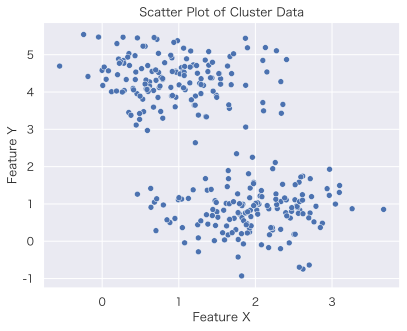

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用seaborn绘制散点图
sns.scatterplot(data=df, x="x", y="y")

# 设置图表标题和轴标签
plt.title("Scatter Plot of Cluster Data")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()

**应用K-means聚类**

接下来，我们应用K-means聚类算法，并将聚类结果添加到DataFrame中。

In [15]:
from sklearn.cluster import KMeans

# 定义K-means模型并拟合数据
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
df["cluster"] = kmeans.fit_predict(df[["x", "y"]])

# 显示带有聚类标签的数据前几行
df.head()

,x,y,cluster
0,2.406157,4.870475,0
1,2.580767,0.828599,1
2,1.062696,5.176351,0
3,2.548219,0.900839,1
4,1.390161,5.084895,0


注意

1. `KMeans` 函数会生成一个指定的模型（比如分2类），返回 `kmeans` 变量即模型本身。
2. 把数据`df`，传递给`kmeans.fit_predict()` 函数，既可以拟合模型并对每个样本进行预测
3. 预测的目标是类别，这就等于给每个样本进行归类，并获得一个类别的标签
4. 最后把预测（归类）的结果，写入`df['cluster']`中。


**KMeans函数常用参数解释**

1. **n_clusters**:
   - **作用**：指定要形成的聚类数，也就是我们希望算法将数据分成多少组。
   - **类型**：整数
   - **示例**：`n_clusters=2` 表示将数据分为2个聚类。

2. **random_state**:
   - **作用**：确定随机数生成器的种子，以保证每次运行K-means时结果相同。这对于结果复现性很重要。
   - **类型**：整数
   - **示例**：`random_state=42` 确保每次运行代码时，生成的聚类结果一致。

3. **n_init**:
   - **作用**：指定K-means算法运行的次数，每次运行算法时都会有不同的初始质心选择。算法将选择其中最优的结果（即总距离最小的聚类结果）。
   - **类型**：整数
   - **默认值**：10，未来会改为'auto'，因此指定为'auto'可以避免警报
   - **示例**：`n_init=10` 表示K-means算法会运行10次，每次选择不同的初始质心，然后选择其中最优的结果。


**可视化聚类结果**

最后，我们绘制聚类结果的散点图，并标记每个聚类的中心。

(同样，绘图我们后面的章节会详细讲解)

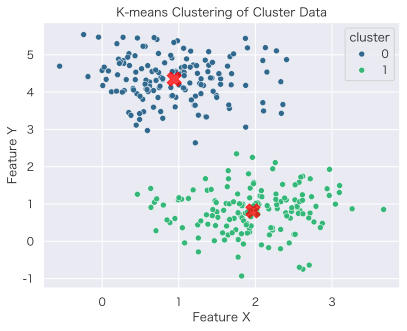

In [16]:
# 绘制带有聚类结果的散点图
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='viridis')

# 获取聚类中心
centers = kmeans.cluster_centers_

# 在图中标记聚类中心
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering of Cluster Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()


## 层次聚类



### 层次聚类简述

**目标**：
层次聚类的主要目标是将一组数据点（一组样本）逐步合并成越来越大的簇，直到所有数据点都属于一个大簇，或达到预设的聚类数量。

**基本原理**：

1. **距离度量**：计算每对数据点之间的距离或相似度，通常使用欧氏距离、曼哈顿距离或相关系数等进行度量。
2. **合并策略**：选择合适的合并策略（linkage），常见的包括单链接（single linkage）、完全链接（complete linkage）和平均链接（average linkage）等。
3. **聚类形成**：根据距离度量和合并策略，逐步合并最相似的数据点或簇，形成层次化的聚类结构。
4. **树状图绘制**：通过绘制聚类树（dendrogram）来展示数据点之间的聚类关系。

**适用情况**：

- **数据特点**：适用于数据点之间存在层次化结构的情况，即一些数据点更倾向于聚在一起形成子群，而这些子群又可以进一步合并成更大的群体。
- **距离度量**：需要选择合适的距离度量方式，以准确反映数据点之间的相似度或距离。
- **聚类数量**：不需要预先指定聚类数量，可以根据聚类树来选择合适的聚类数量。
- **可解释性**：提供了层次化的聚类结构，有助于理解数据点之间的关系和组织结构。

**应用举例**：

- 生态学：根据物种的相似性对生态系统中的植物或动物进行聚类，研究生态系统的结构和功能。
- 生物学：如基因表达数据的聚类，发现不同组织或条件下基因的表达模式。
- 社交网络分析：将社交网络中的用户按照交流行为进行聚类，识别不同的社交群体或社区。
- 文档聚类：将文档集合根据主题内容进行层次化聚类，用于文本摘要或主题分类。

### 层次聚类的迭代过程演示


层次聚类（分层聚类）的基本原理：结合动图

1.  先把距离最近的2个样本聚在一起，形成一个小类（p5+p6）

2.  现存的样本中，p4和（p5+p6）距离最近，形成一个新的小类（p4+p5+p6）

3.  现存的样本中，p1和p2的距离最近，形成一个新的小类（p1+p2）

4.  现存的样本中，p0和(p1+p2)的距离最近，形成一个新的小类（p0+p1+p2）

5.  现存的样本中，p3和（p4+p5+p6）的距离最近，形成一个新的小类（p3 +
    p4+p5+p6）

![Clustering with Scikit with GIFs -
dashee87.github.io](./images/media/image22.gif)

选择你需要的分类数，即可获得具体的分类。

**距离的计算**

在进行聚类合并时，我们需要考虑两种距离的计算方式：

1. **点与点之间的距离**：这是指两个单独数据点之间的距离，我们常用的是欧几里得距离（euclidean），就像是在数学课上计算平面两点之间的直线距离。

2. **点与聚类，或者聚类与聚类之间的距离**：在层次聚类中，我们还需要考虑两个聚类之间的距离。这里常用的方法之一是 Ward 方法。Ward 方法的观点是，2个聚类合并后产生的新聚类，其方差越小，说明原来的2个聚类越接近。

### 一个范例

**数据准备**

我们这次采用iris数据的前20行来作为演示。 数据下载链接（可以右键另存为） [iris.csv](data/iris.csv)

In [17]:
# 导入模块
import pandas as pd
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler

# 加载数据集
iris = pd.read_csv('data/iris.csv')

# 选择前 20 个样本，并且不需要类别（假装我们不知道类别）
iris_subset = iris.iloc[:20, :4]

iris_subset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


首先我们要对数据进行标准化，以确保每个特征在相同的尺度上，从而避免某些特征对聚类结果的影响过大。

（尺度差异巨大的情况，比如上市公司作为样本，其中“公司规模（10亿到数千亿）”和“员工中本科学历比例（0到1）”，尺度的差异就非常巨大。）

我们使用 `StandardScaler()` 把全部数据转为 Z-score。

In [18]:

# 把数据标准化为均值为0，标准差为1的标准正态分布，其实就是计算z-score
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_subset)

scaled_data[:5,:] # 看前5行

array([[ 0.15615123,  0.05037927, -0.24580325, -0.3847548 ],
       [-0.32431409, -1.20910253, -0.24580325, -0.3847548 ],
       [-0.8047794 , -0.70530981, -0.94809823, -0.3847548 ],
       [-1.04501206, -0.95720617,  0.45649174, -0.3847548 ],
       [-0.08408143,  0.30227563, -0.24580325, -0.3847548 ]])

In [19]:
# 简单计算第1列的均值，应该已经为0
scaled_data[:,0].mean().round(2)

0.0

`StandardScaler` 是 `scikit-learn` 中常用的标准化方法之一，用于将特征缩放到均值为0，标准差为1的标准正态分布。以下是对 `StandardScaler` 以及几个常用的标准化函数的简要说明：

**1. StandardScaler**

- **功能**：将特征缩放到均值为0，标准差为1的标准正态分布。
- **公式**：$x_{scaled} = \frac{x - \mu}{\sigma}$
- **特点**：不改变原始数据的分布形状，适用于大多数情况下的标准化需求。

**2. Min-Max 标准化**

- **功能**：将特征缩放到指定范围内，常见的是[0, 1]。
- **公式**：$x_{scaled} = \frac{x - \min(x)}{\max(x) - \min(x)}$
- **特点**：保留了原始数据的分布形状，适用于特征的最大和最小值已知的情况。

**3. RobustScaler**

- **功能**：基于中位数和四分位数的缩放，对异常值不敏感。
- **公式**：$x_{scaled} = \frac{x - \text{中位数}(x)}{\text{四分位数}(x_{75\%}) - \text{四分位数}(x_{25\%})}$
- **特点**：适用于数据包含异常值的情况，对异常值不敏感，保留了原始数据的分布形状。

**4. MaxAbsScaler**

- **功能**：将特征缩放到[-1, 1]范围内，除以每个特征的绝对值的最大值。
- **公式**：$x_{scaled} = \frac{x}{\max(|x|)}$
- **特点**：保留了原始数据的分布形状，适用于稀疏数据。

**5. Normalizer**

- **功能**：对每个样本的特征向量进行缩放，使得每个样本的特征向量的欧氏长度等于1。
- **公式**：$x_{scaled} = \frac{x}{\sqrt{\sum_{i=1}^{n} x_i^2}}$
- **特点**：适用于样本具有不同的尺度且需要按照特征向量的欧氏长度进行缩放的情况。


**绘制树状图**

我们这里采用欧氏距离来计算点的距离（默认值，所参数可以省略），用ward方法来计算聚类之间的距离。

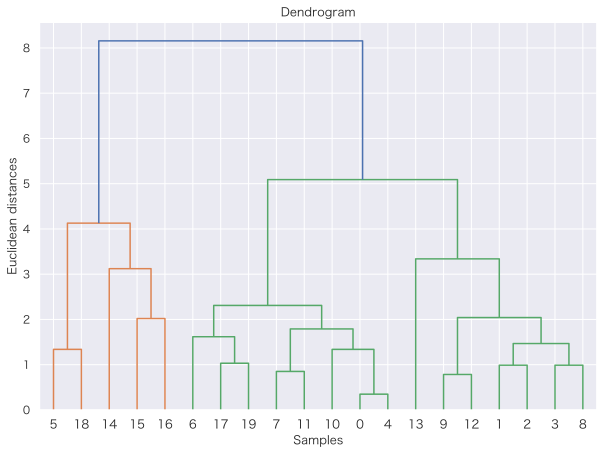

In [20]:
# 生成树状图链接矩阵
import scipy.cluster.hierarchy as sch

linked = sch.linkage(scaled_data, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


**应用凝聚层次聚类**

使用 sklearn 的 AgglomerativeClustering 进行层次聚类。

同样，参数`metric='euclidean', linkage='ward'`表示我们采用欧氏距离和 ward方法。 `n_clusters=3`表示我们希望分3类（思考，如果分3类，从上图看，大概是从哪里开始分？）

In [21]:
# 应用凝聚层次聚类
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
iris_subset['cluster'] = hc.fit_predict(scaled_data)

iris_subset


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


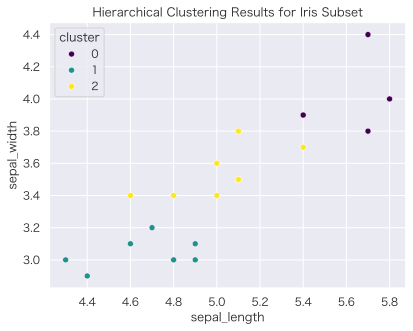

In [22]:
# 绘制聚类结果的散点图
sns.scatterplot(data=iris_subset, x=iris_subset.columns[0], y=iris_subset.columns[1], hue='cluster', palette='viridis')
plt.title('Hierarchical Clustering Results for Iris Subset')
plt.xlabel(iris_subset.columns[0])
plt.ylabel(iris_subset.columns[1])
plt.show()
